In [29]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller

#References:
#https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
#https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

In [30]:
def parser(x):
    return datetime.strptime(x, '%d-%b-%Y')

nifty_data = pd.read_csv('./ml-project-data/NIFTY-50/2015.csv', header=0, 
                                                              parse_dates=[0], index_col=0, squeeze=True, 
                                                              date_parser=parser)
print(nifty_data)
scaler = MinMaxScaler(feature_range=(-1, 1))
nifty_data['Average'] = nifty_data.loc[: , "High":"Low"].mean(axis=1)
nifty = scaler.fit_transform(nifty_data[['Average', 'Shares Traded', 'Turnover (Rs. Cr)']])

               Open     High      Low    Close  Shares Traded  \
Date                                                            
2015-01-01  8272.80  8294.70  8248.75  8284.00       56560411   
2015-01-02  8288.70  8410.60  8288.70  8395.45      101887024   
2015-01-05  8407.95  8445.60  8363.90  8378.40      118160545   
2015-01-06  8325.30  8327.85  8111.35  8127.35      172799618   
2015-01-07  8118.65  8151.20  8065.45  8102.10      164075424   
2015-01-08  8191.40  8243.50  8167.30  8234.60      143802802   
2015-01-09  8285.45  8303.30  8190.80  8284.50      152612528   
2015-01-12  8291.35  8332.60  8245.60  8323.00      103153908   
2015-01-13  8346.15  8356.65  8267.90  8299.40      129561892   
2015-01-14  8307.25  8326.45  8236.65  8277.55      150621631   
2015-01-15  8424.50  8527.10  8380.55  8494.15      232138802   
2015-01-16  8504.05  8530.75  8452.25  8513.80      181365905   
2015-01-19  8550.05  8570.95  8531.50  8550.70      129346422   
2015-01-20  8575.10  8707

In [31]:
tcs_data = pd.read_csv('./ml-project-data/TCS/01-01-2014-TO-31-12-2014TCSEQN.csv')
tcs = scaler.fit_transform(tcs_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])

In [32]:
infy_data = pd.read_csv('./ml-project-data/INFY/01-01-2014-TO-31-12-2014INFYEQN.csv')
infy = scaler.fit_transform(infy_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])

In [33]:
hcl_data = pd.read_csv('./ml-project-data/HCL/01-01-2014-TO-31-12-2014HCLTECHEQN.csv')
hcl = scaler.fit_transform(hcl_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])

In [34]:
techm_data = pd.read_csv('./ml-project-data/TECHM/01-01-2014-TO-31-12-2014TECHMEQN.csv')
techm = scaler.fit_transform(techm_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])

In [35]:
wipro_data = pd.read_csv('./ml-project-data/WIPRO/01-01-2014-TO-31-12-2014WIPROEQN.csv')
wipro = scaler.fit_transform(wipro_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])

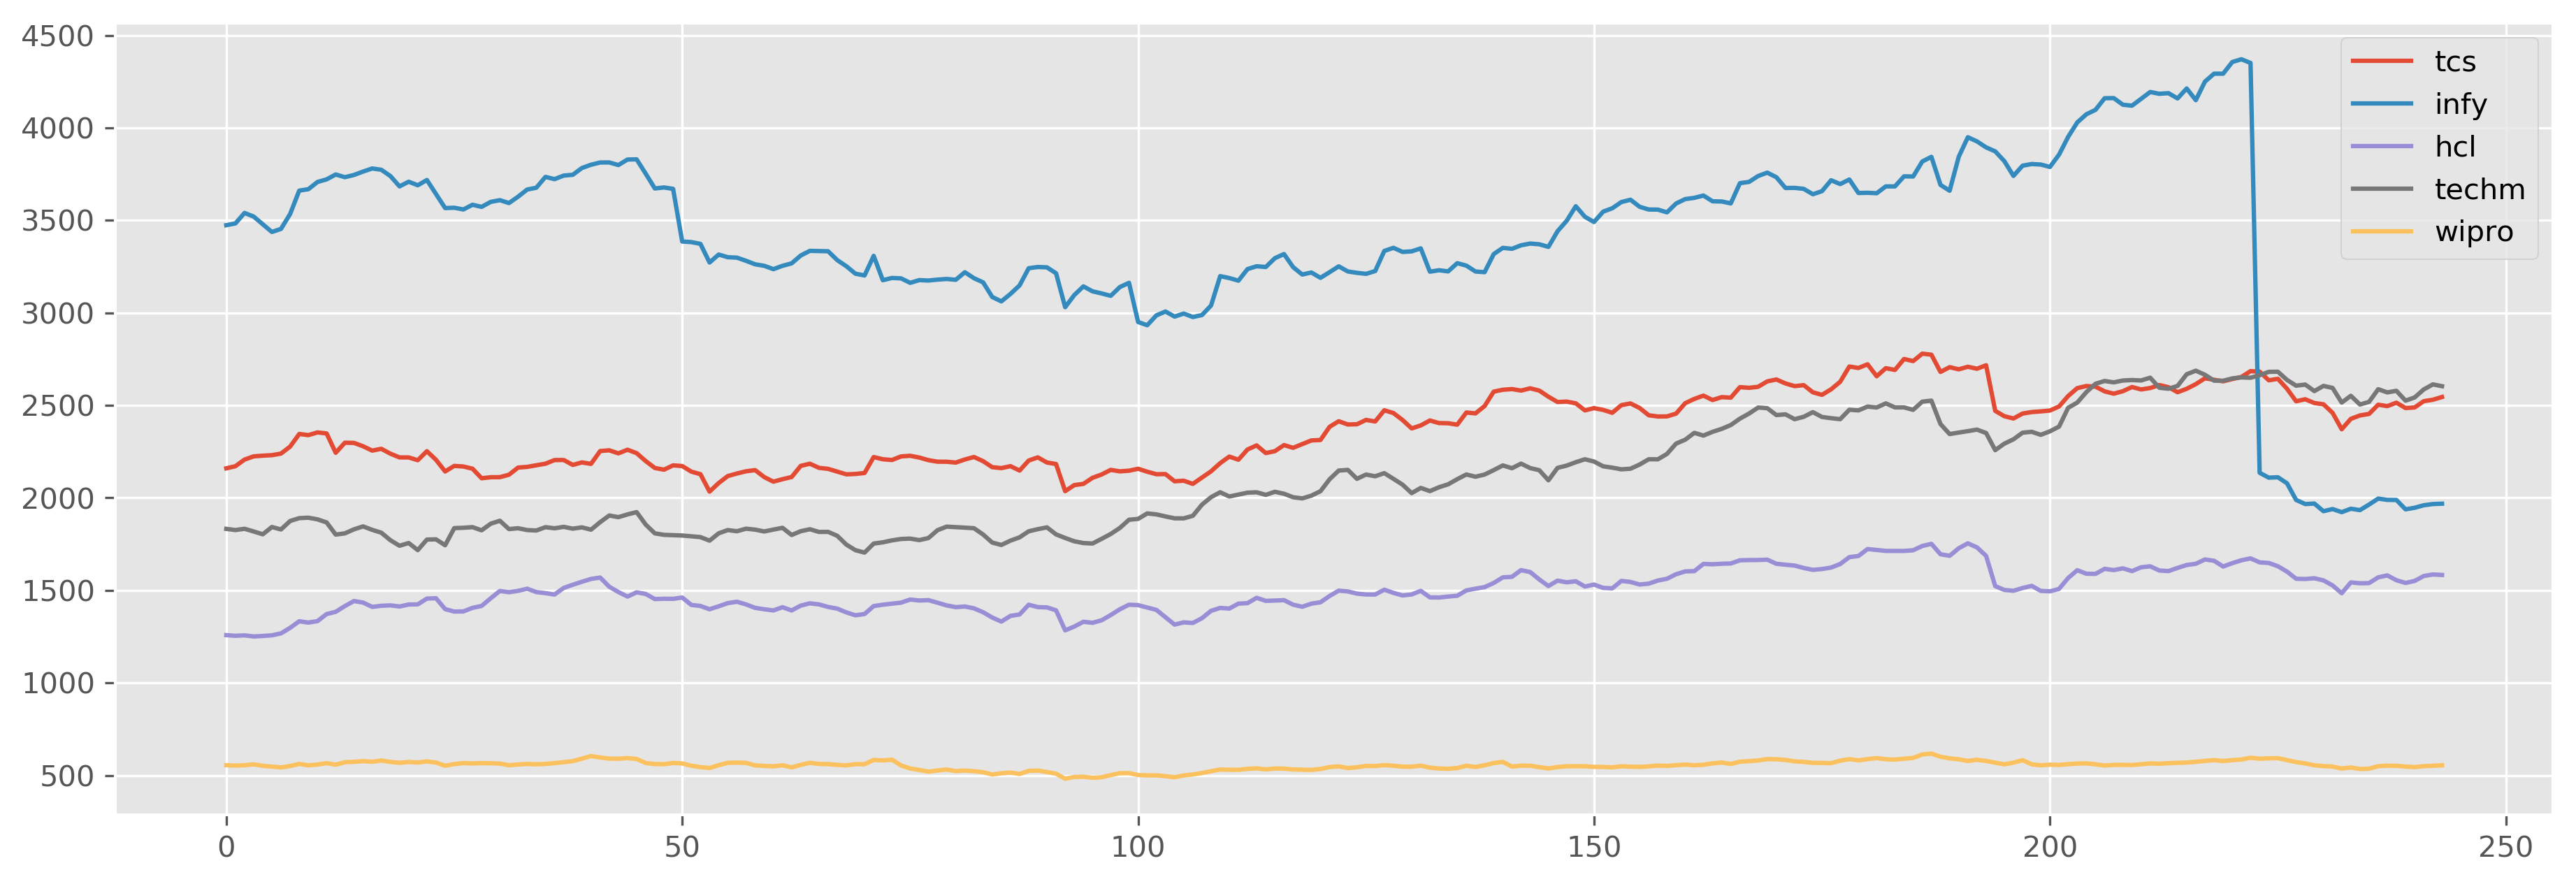

In [36]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 5), dpi=300)
# plt.plot(nifty_data['Average'], label="nifty")
plt.plot(tcs_data['Average Price'], label="tcs")
plt.plot(infy_data['Average Price'], label="infy")
plt.plot(hcl_data['Average Price'], label="hcl")
plt.plot(techm_data['Average Price'], label="techm")
plt.plot(wipro_data['Average Price'], label="wipro")
plt.legend(loc='best')
plt.show()

In [37]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
#     rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    plt.style.use('ggplot')
    plt.figure(figsize=(15, 5), dpi=300)
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

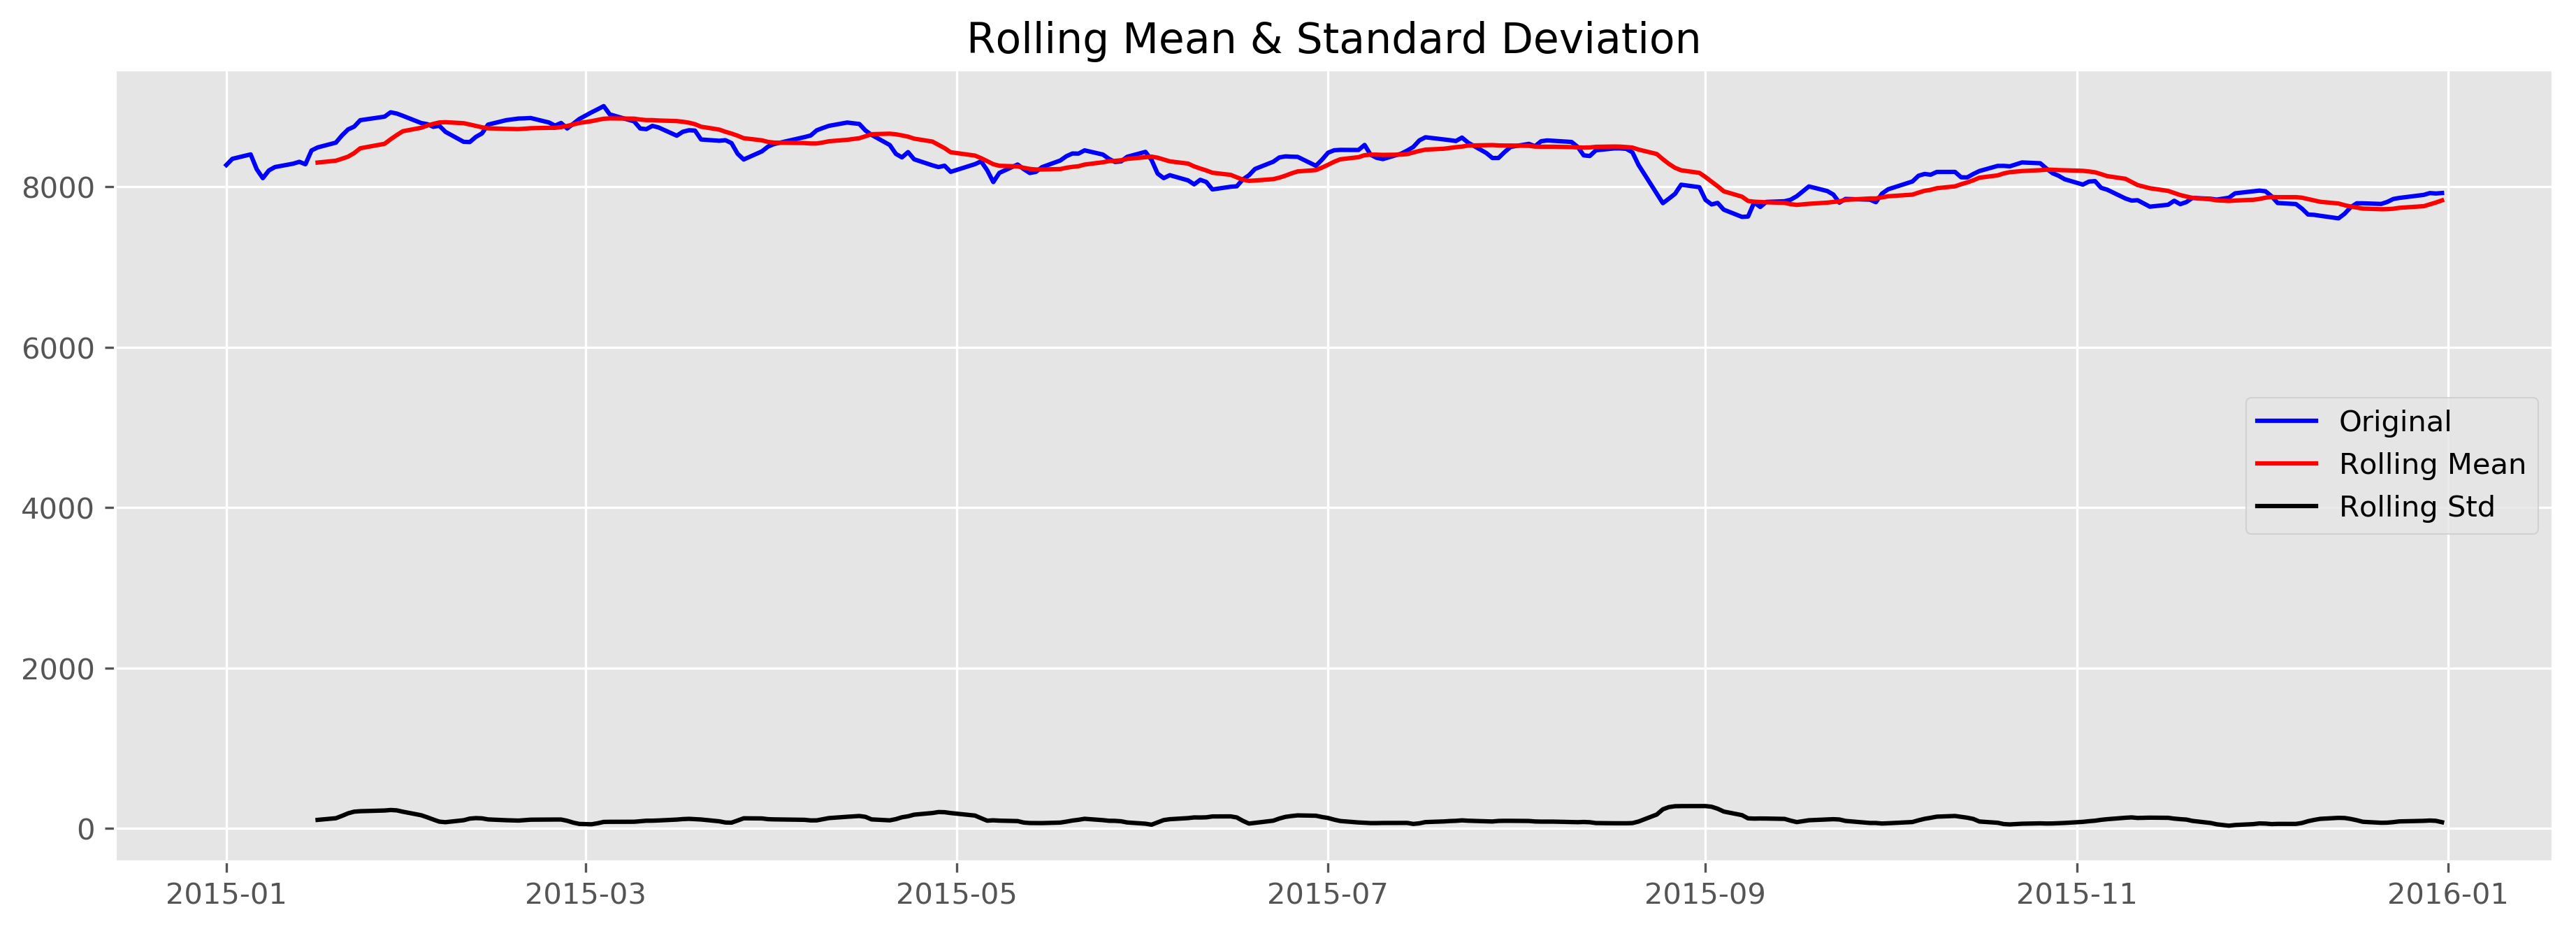

Results of Dickey-Fuller Test:
Test Statistic                  -1.737307
p-value                          0.412000
#Lags Used                       2.000000
Number of Observations Used    245.000000
Critical Value (1%)             -3.457326
Critical Value (5%)             -2.873410
Critical Value (10%)            -2.573096
dtype: float64


In [38]:
test_stationarity(nifty_data['Average'])

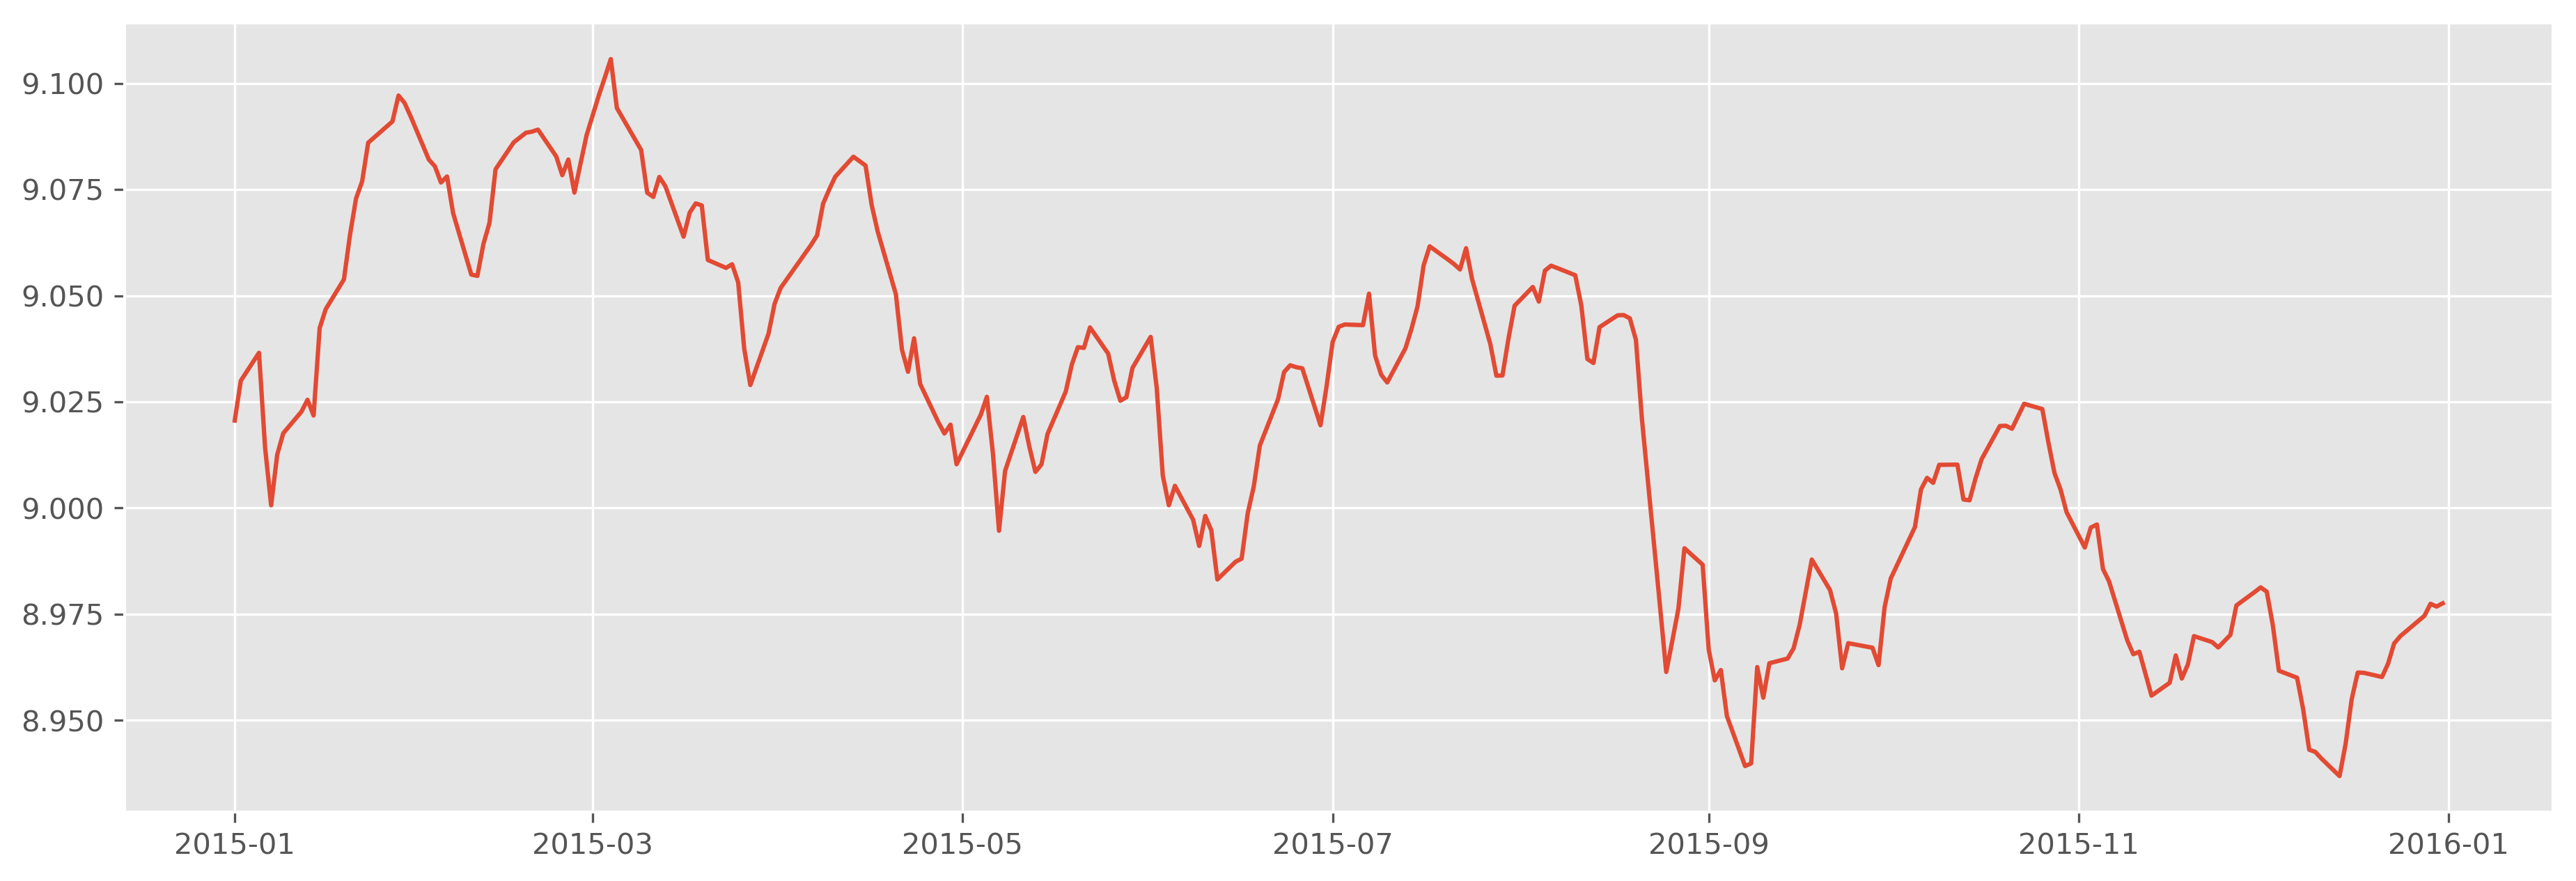

In [39]:
nifty_avg_log = np.log(nifty_data['Average'])
plt.figure(figsize=(15, 5), dpi=300)
plt.plot(nifty_avg_log)
plt.show()

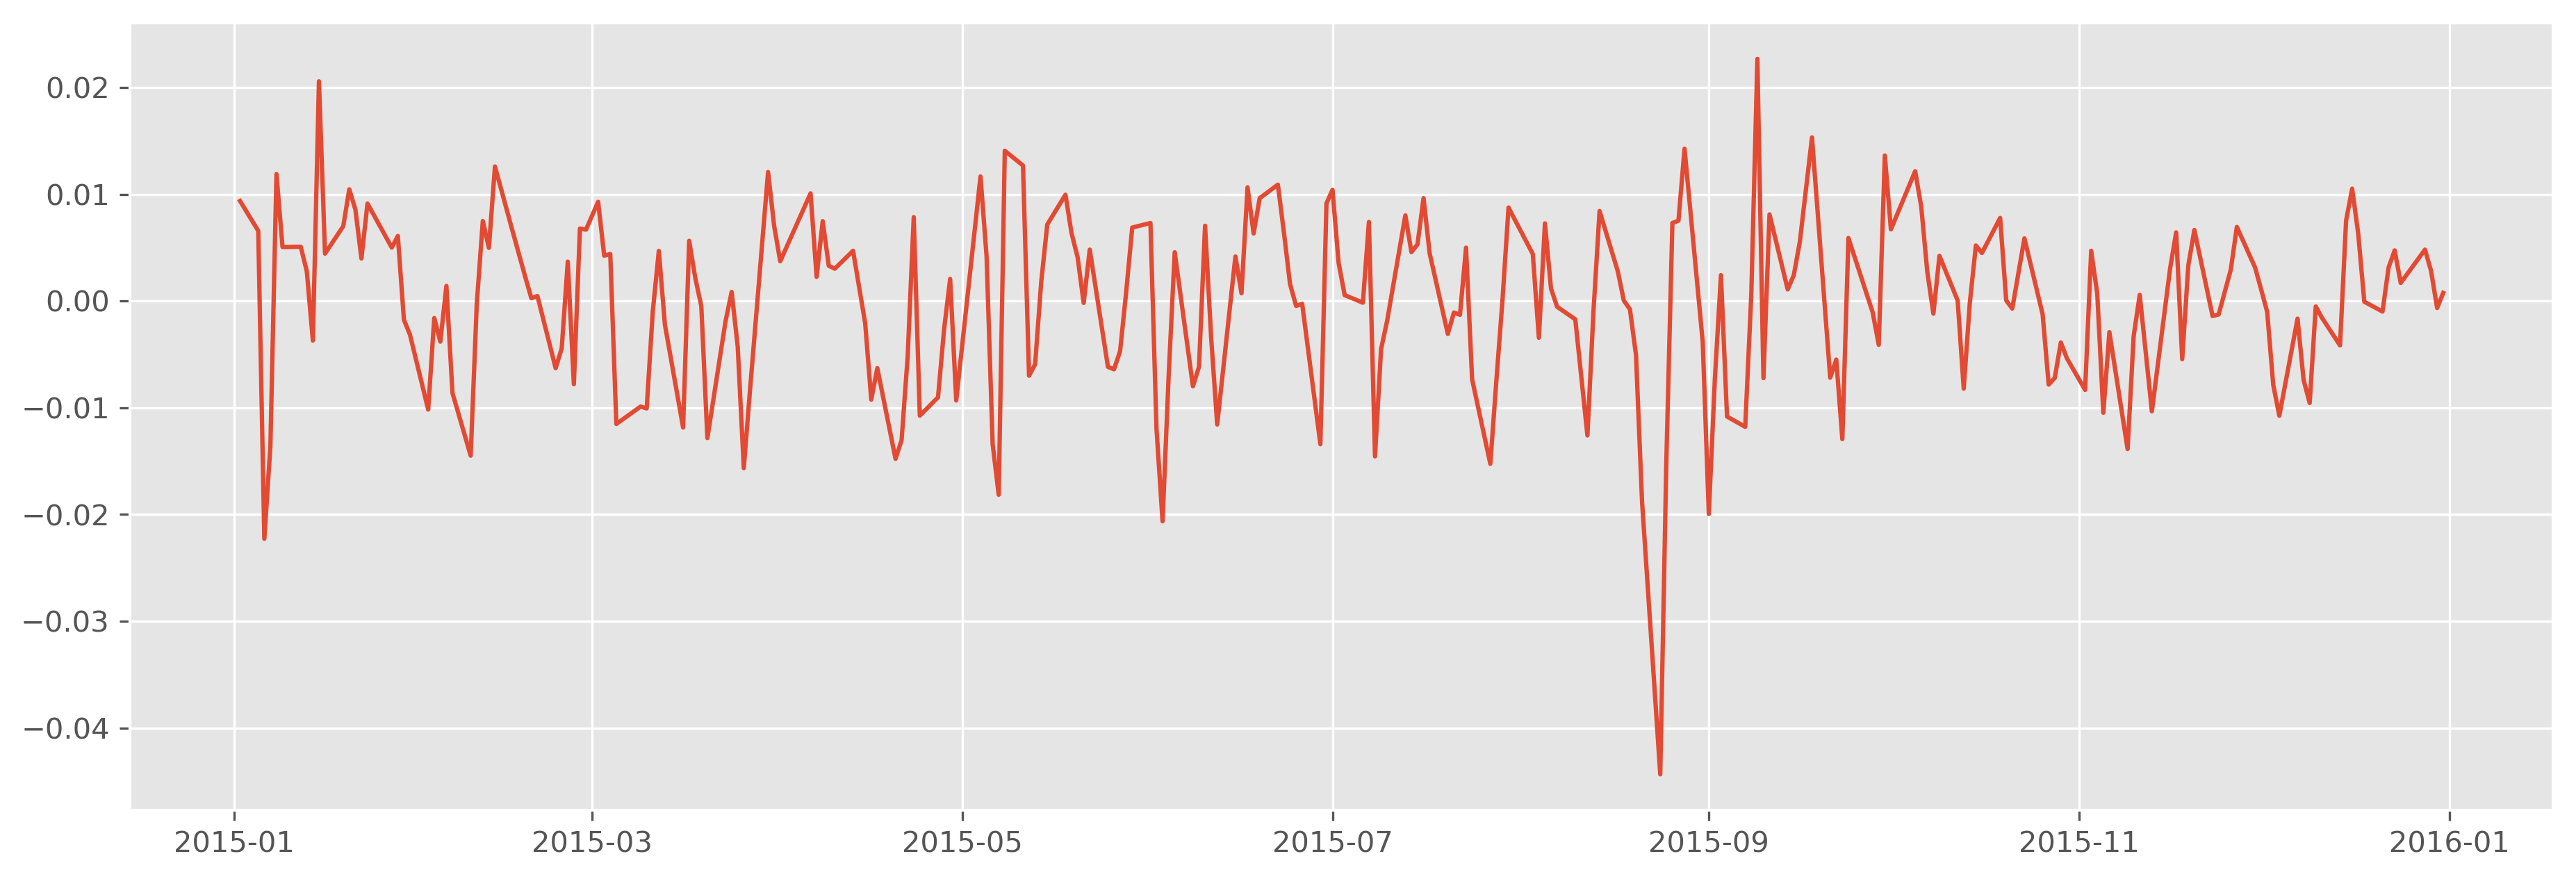

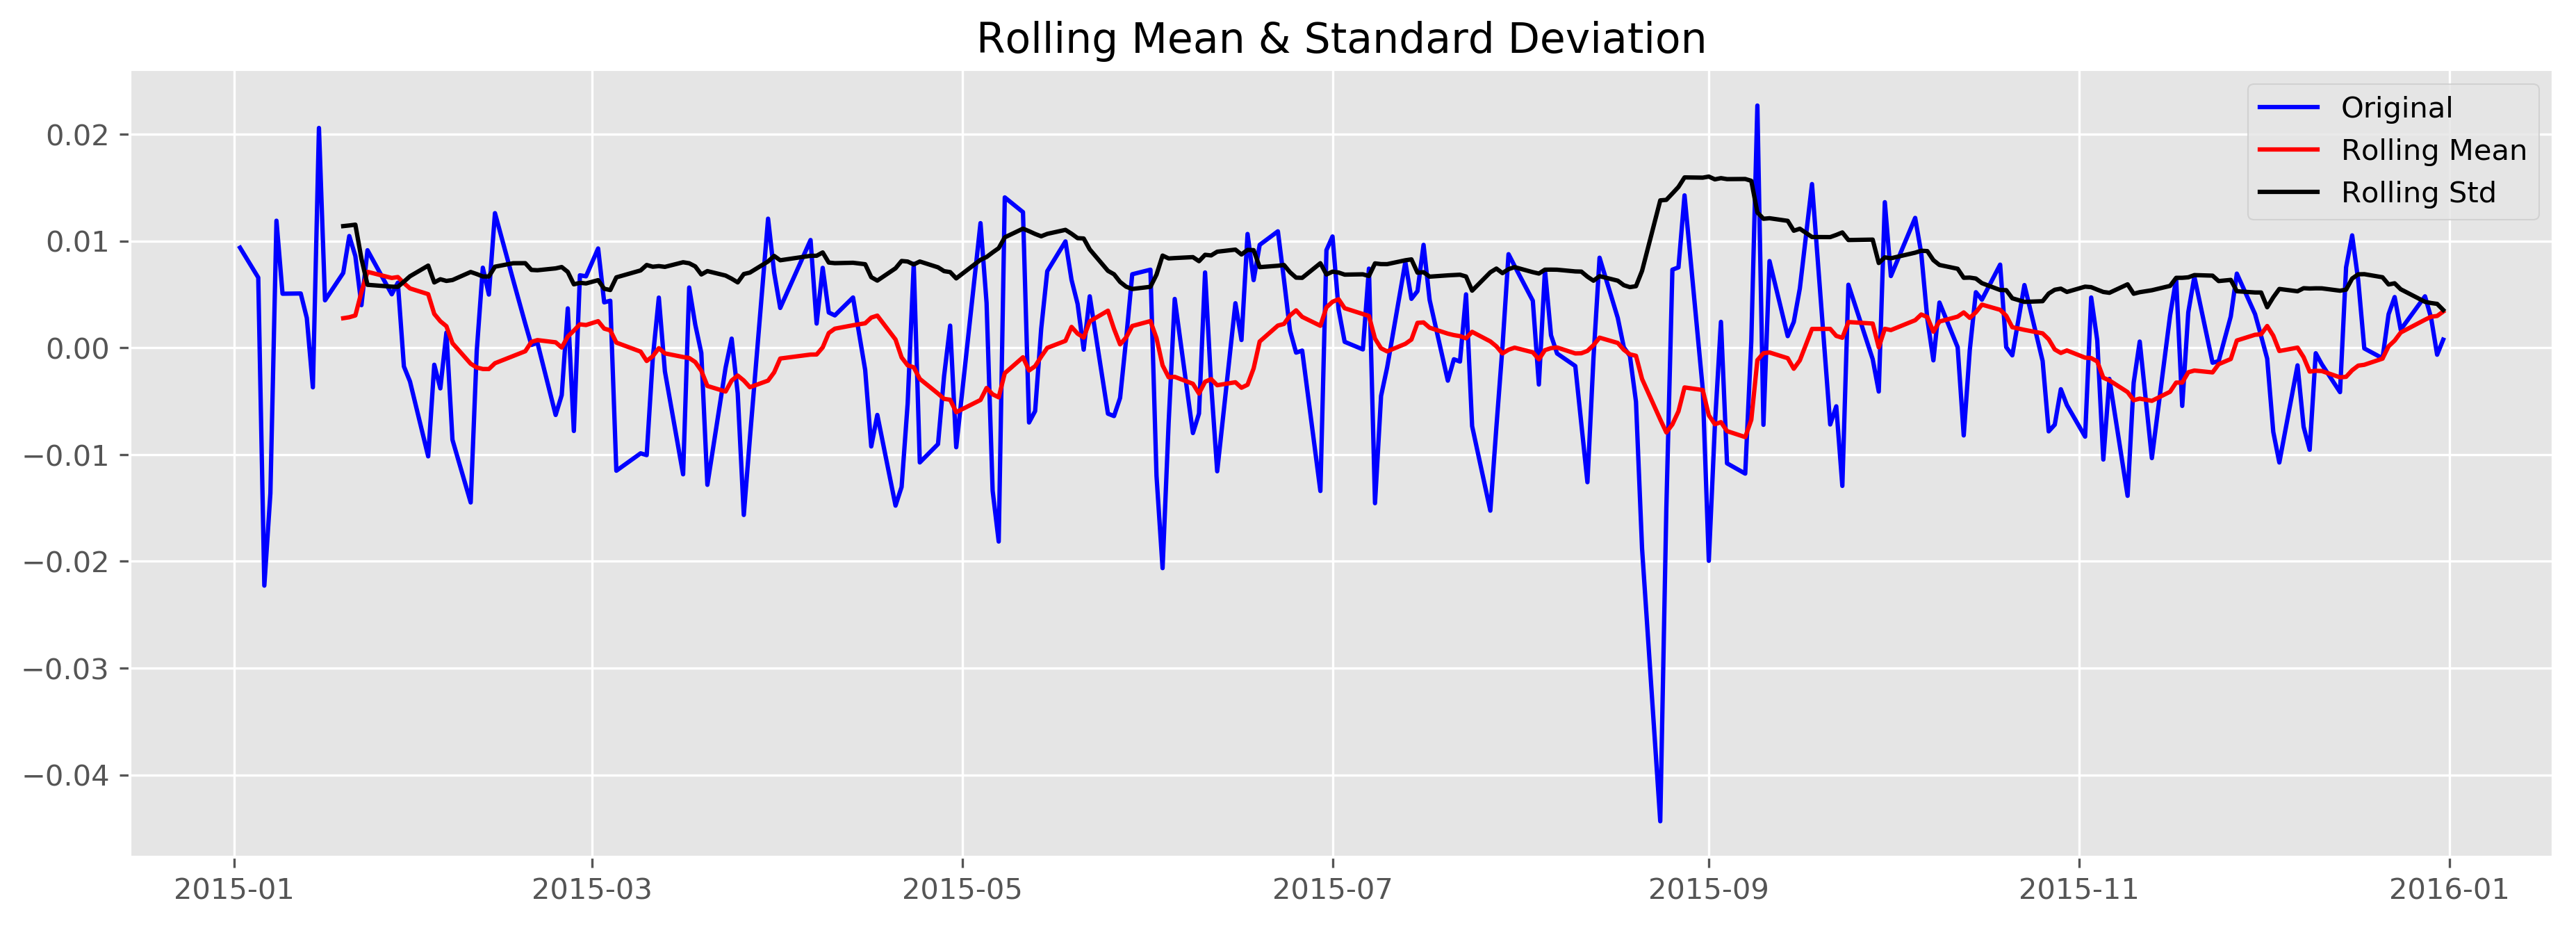

Results of Dickey-Fuller Test:
Test Statistic                -1.074352e+01
p-value                        2.778966e-19
#Lags Used                     1.000000e+00
Number of Observations Used    2.450000e+02
Critical Value (1%)           -3.457326e+00
Critical Value (5%)           -2.873410e+00
Critical Value (10%)          -2.573096e+00
dtype: float64


In [40]:
nifty_avg_log_diff = nifty_avg_log - nifty_avg_log.shift()
nifty_avg_log_diff.dropna(inplace=True)
plt.style.use('ggplot')
plt.figure(figsize=(15, 5), dpi=300)
plt.plot(nifty_avg_log_diff)
nifty_avg_log_diff.dropna(inplace=True)
test_stationarity(nifty_avg_log_diff)

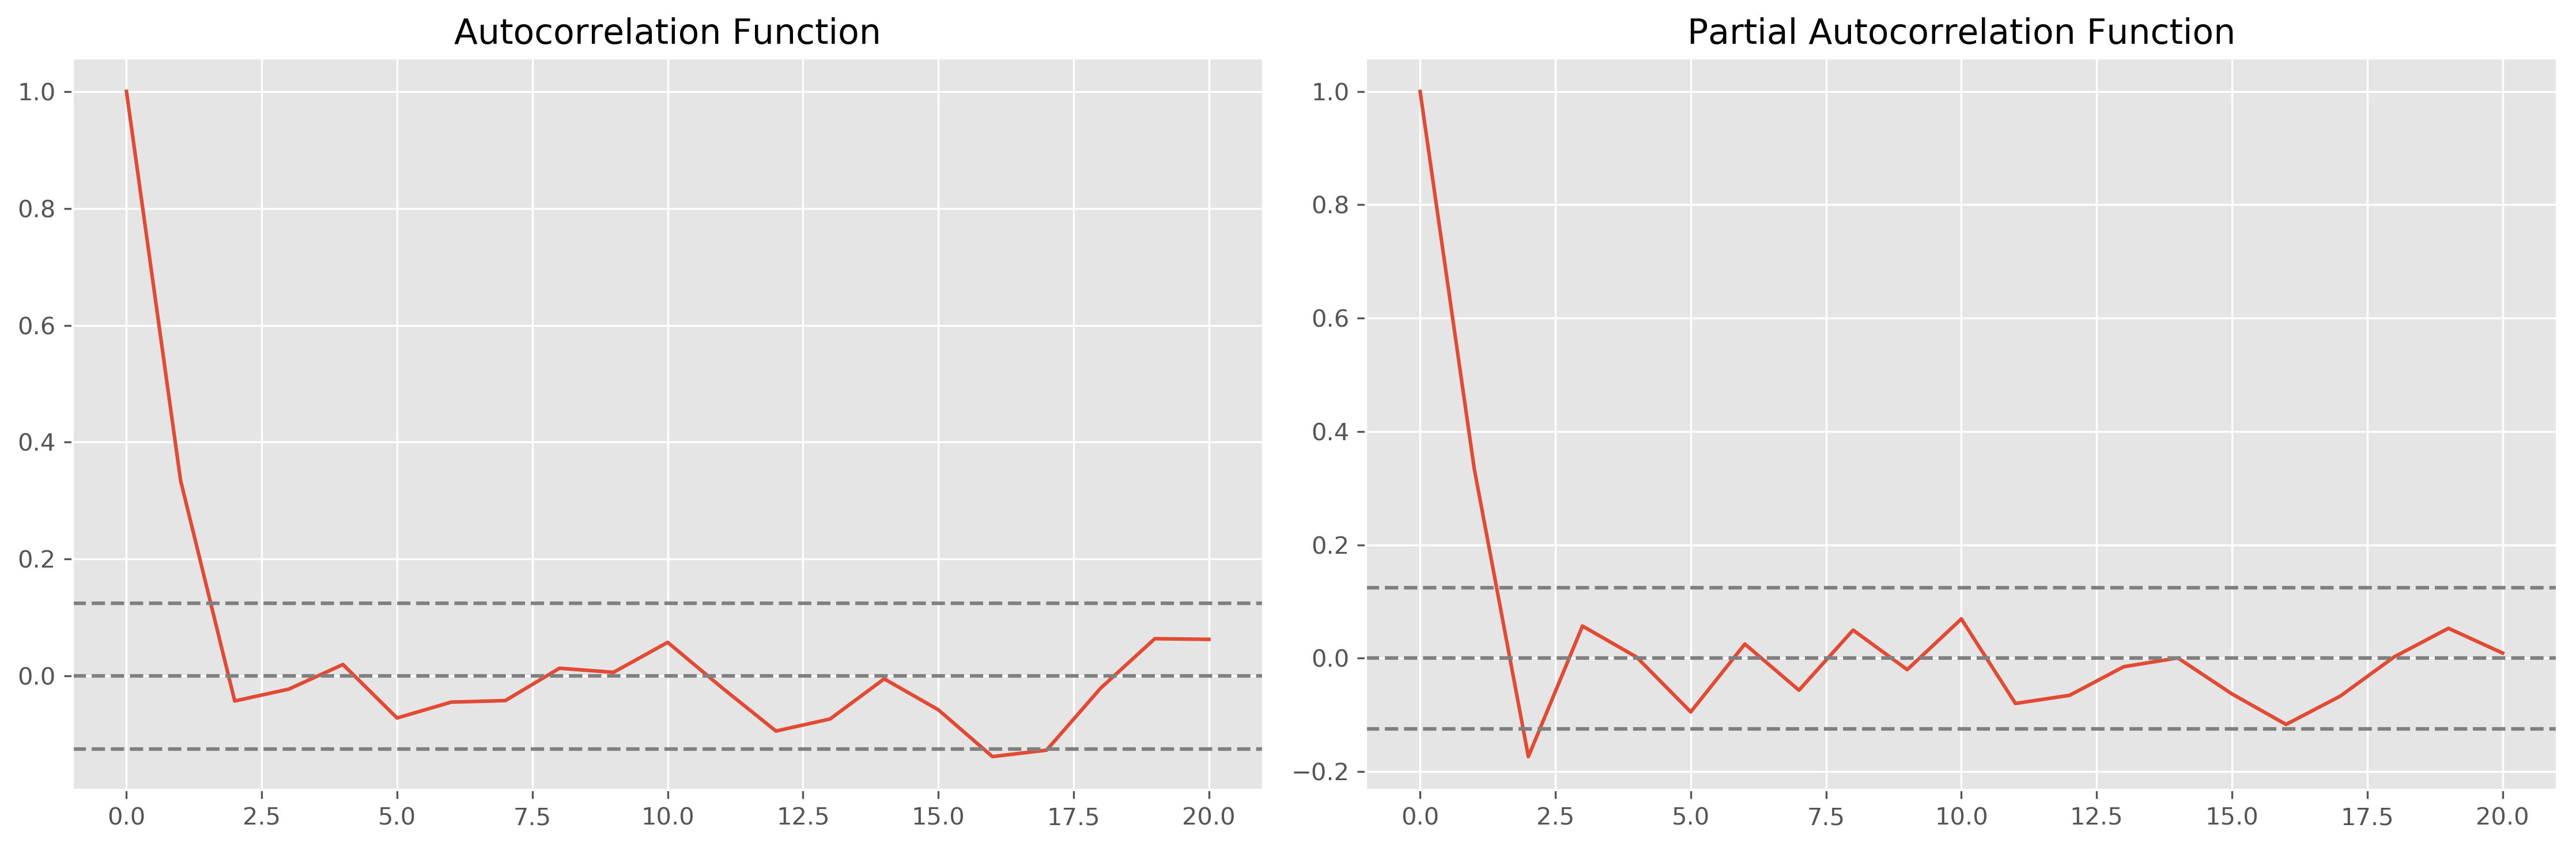

In [41]:
lag_acf = acf(nifty_avg_log_diff, nlags=20)
lag_pacf = pacf(nifty_avg_log_diff, nlags=20, method='ols')
plt.figure(figsize=(15, 5), dpi=300)
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(nifty_avg_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(nifty_avg_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(nifty_avg_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(nifty_avg_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

/home/sriyan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/sriyan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


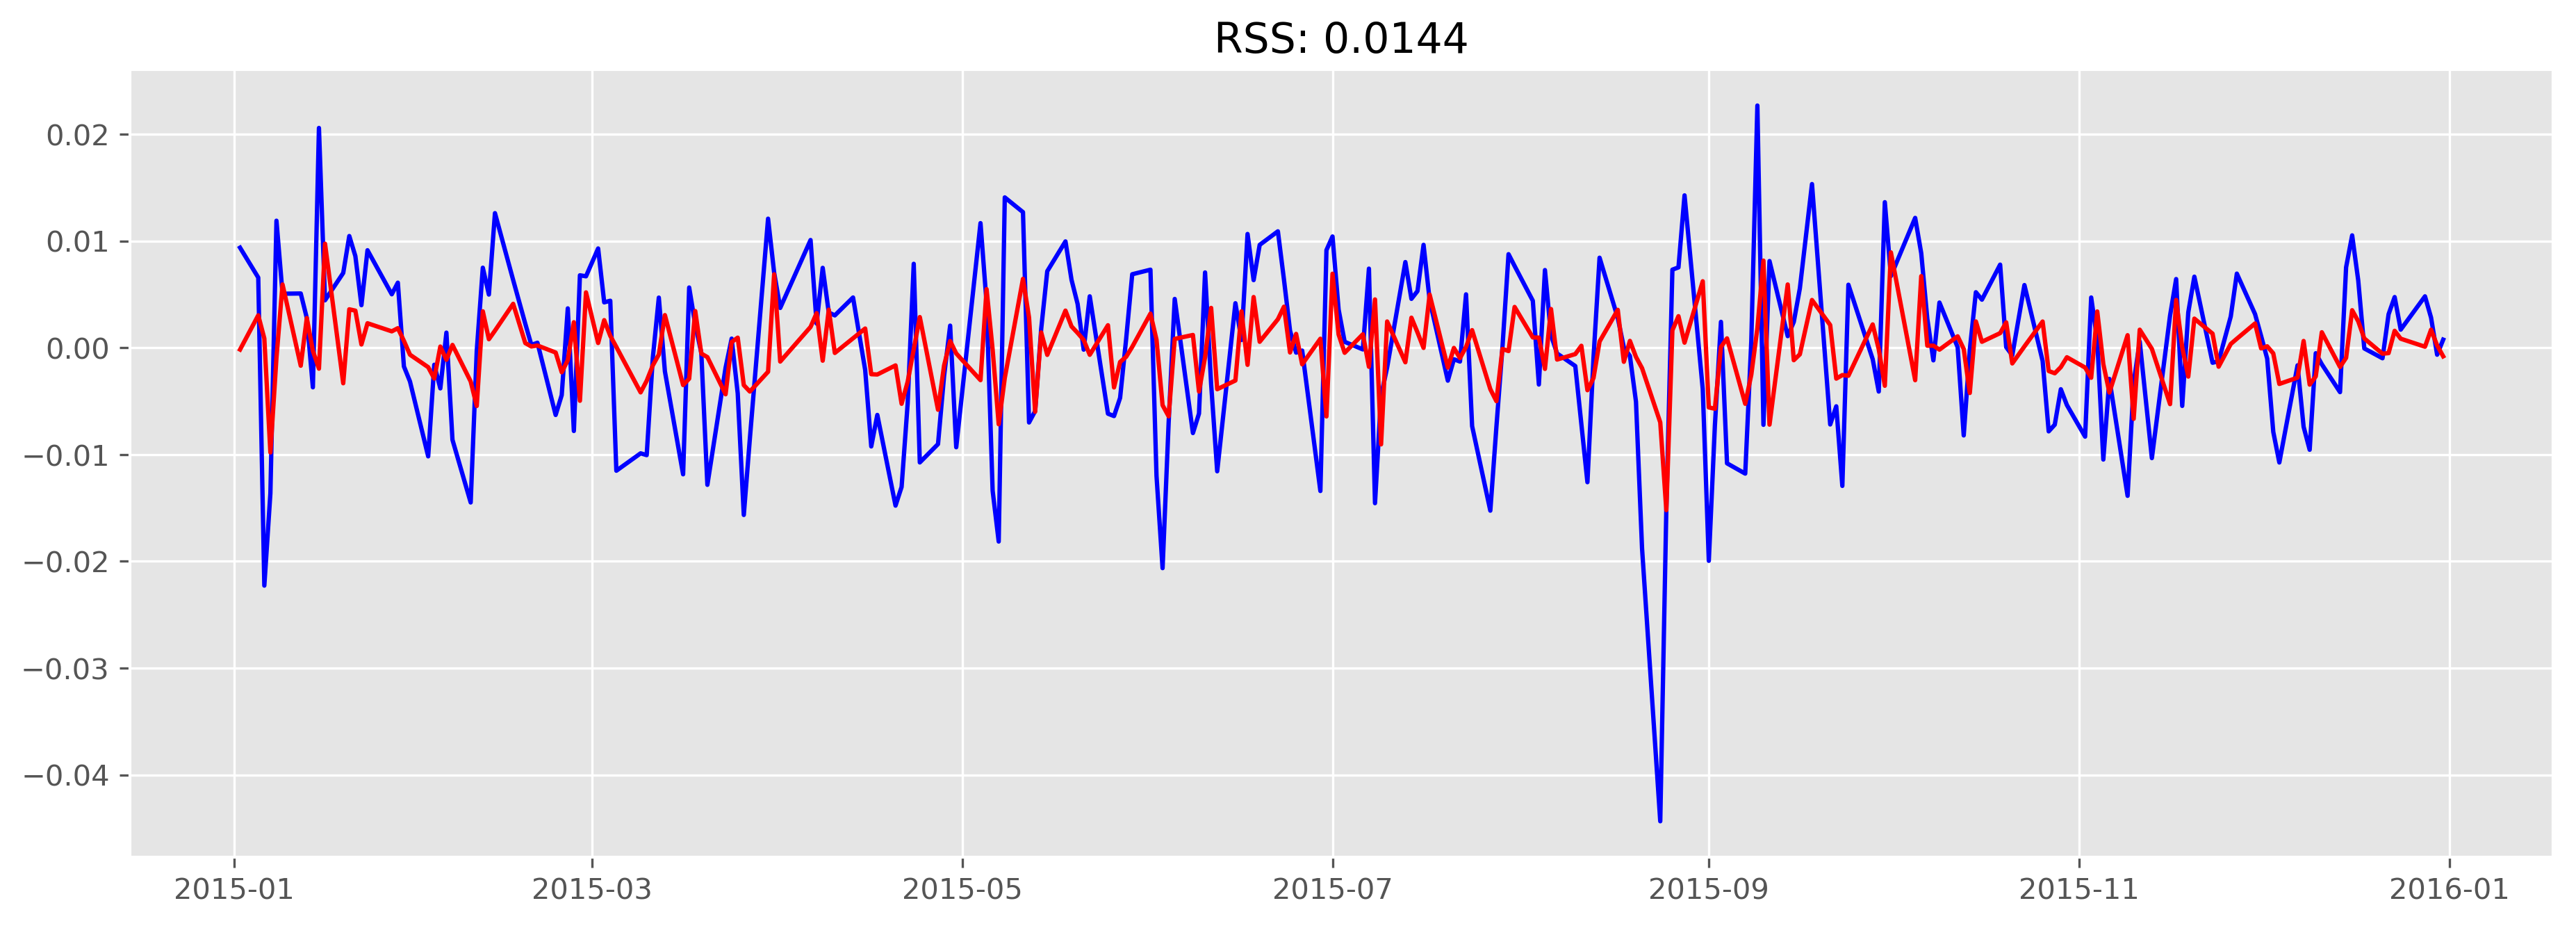

In [42]:
model = ARIMA(nifty_avg_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(15, 5), dpi=300)
plt.plot(nifty_avg_log_diff, color='blue')
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-nifty_avg_log_diff)**2))
plt.show()

In [43]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2015-01-02   -0.000167
2015-01-05    0.003043
2015-01-06    0.000876
2015-01-07   -0.009806
2015-01-08   -0.000923
dtype: float64


In [44]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2015-01-02   -0.000167
2015-01-05    0.002875
2015-01-06    0.003751
2015-01-07   -0.006055
2015-01-08   -0.006978
dtype: float64


In [45]:
predictions_ARIMA_log = pd.Series(nifty_avg_log.ix[0], index=nifty_avg_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

/home/sriyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2015-01-01    9.020598
2015-01-02    9.020431
2015-01-05    9.023474
2015-01-06    9.024349
2015-01-07    9.014543
dtype: float64

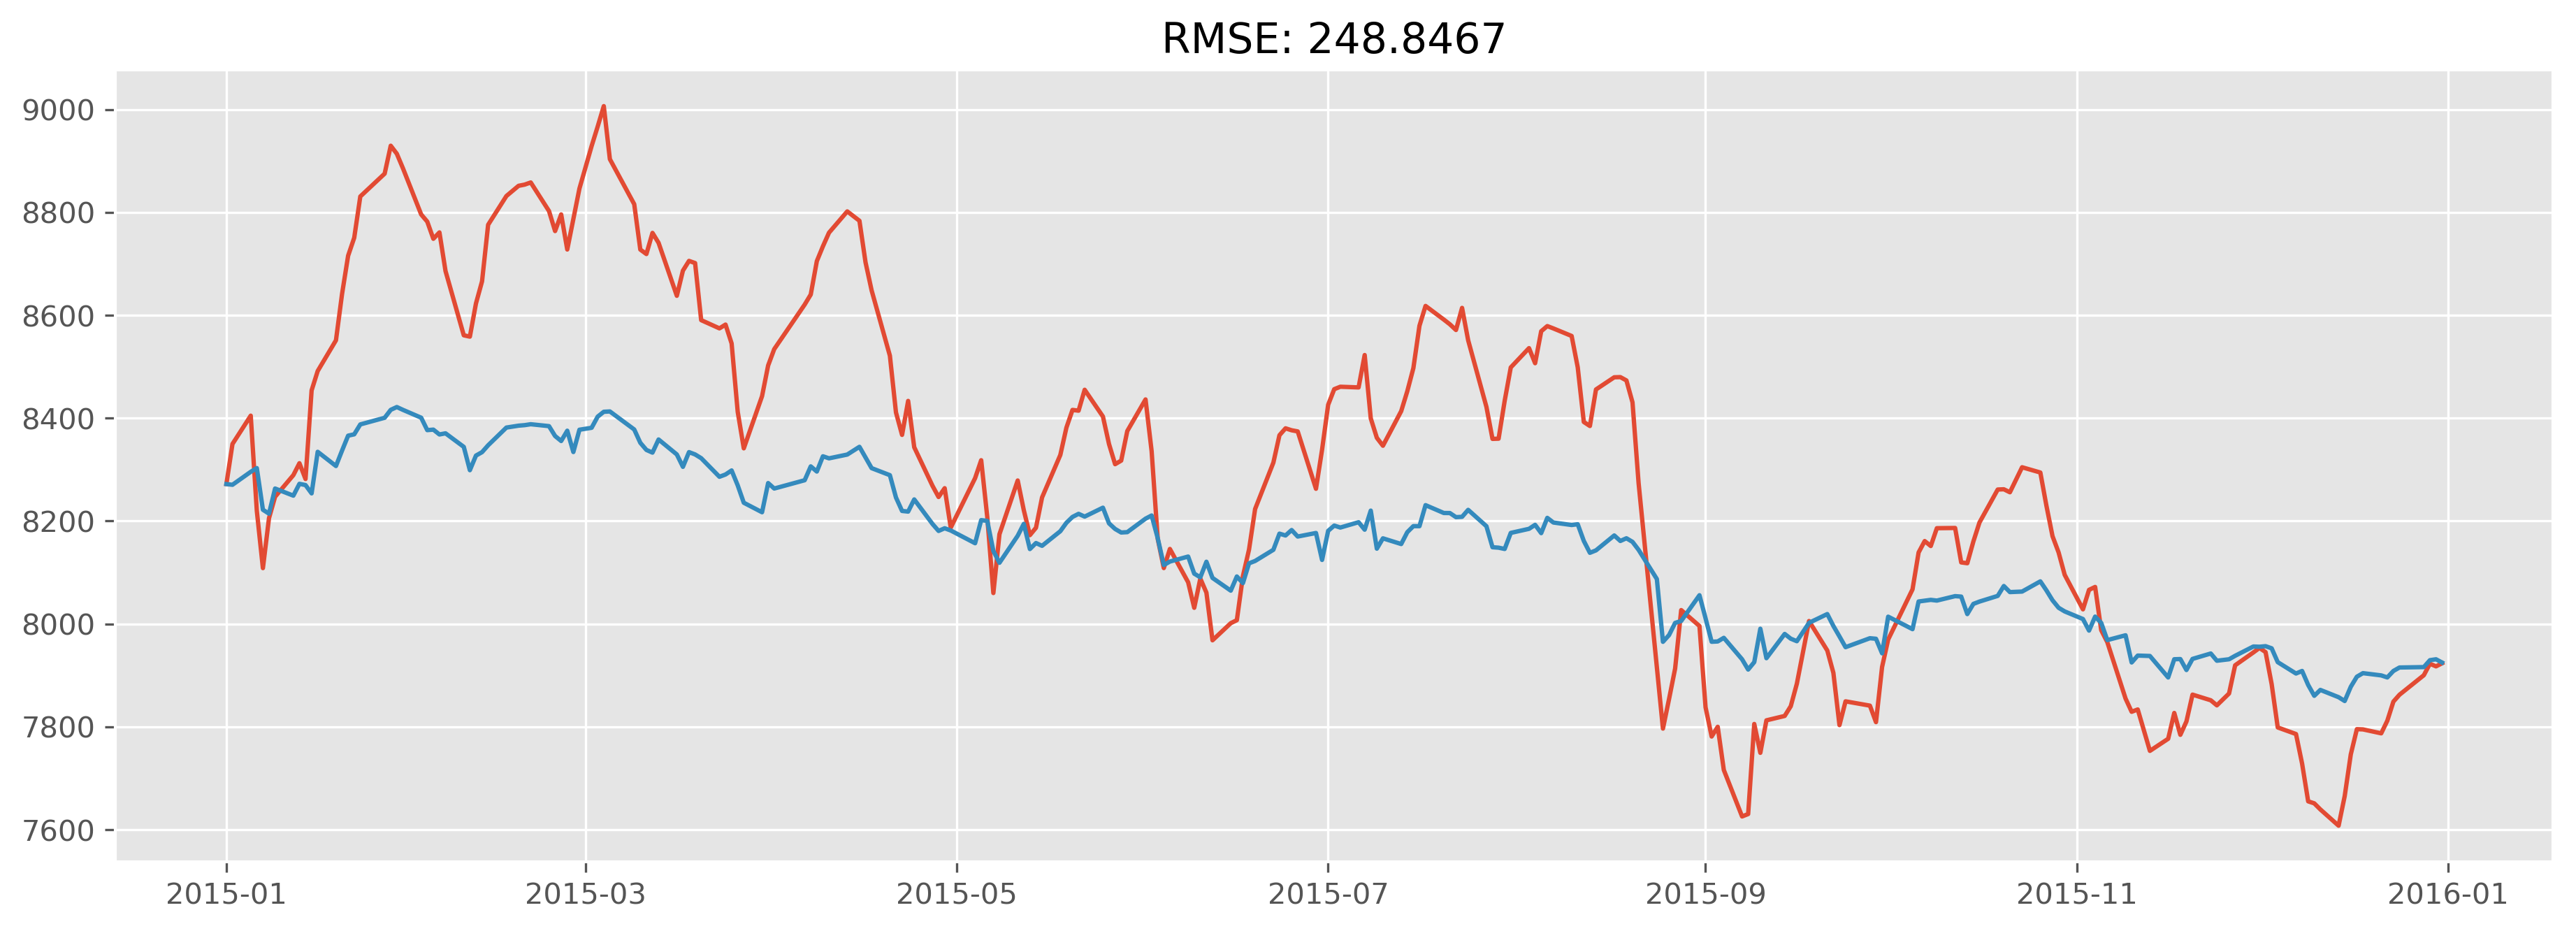

In [46]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(15, 5), dpi=300)
plt.plot(nifty_data['Average'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-nifty_data['Average'])**2)/len(nifty_data['Average'])))
plt.show()